## Cho dữ liệu từ sample data, chọn từ 5-6 cột (number)

### Bài 1: Thực hiện regression (hổi quy tuyến tính) đầu vào 5 cột

- TH1: Multiinput: 5 cột vào -> 1 output
- TH2: Multi input & Multi output: 4 cột vào -> 4 cột ra

**Keyword**: Multi input regression & single output, Multi output regression, simple CNN

---


## Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Get data from csv

### Specific csv

In [ ]:
file = "car_crashes.csv"

### Complete filepath

In [ ]:
filepath = f"./Sampledata/{file}"

In [ ]:
df = pd.read_csv(filepath)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


In [ ]:
df.describe()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137
std,4.122002,2.017747,1.729133,4.508977,3.764672,178.296285,24.835922
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.750000,3.766500,3.894000,10.478000,11.348000,768.430000,114.645000
50%,15.600000,4.608000,4.554000,13.857000,13.775000,858.970000,136.050000
75%,18.500000,6.439000,5.604000,16.140000,16.755000,1007.945000,151.870000
max,23.900000,9.450000,10.038000,23.661000,21.280000,1301.520000,194.780000


## Split data function

In [ ]:
# Split data into train and test (80-20 split)
def train_test_split(X, y, test_size=0.2, random_state=42):
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    test_size = int(test_size * len(X))
    test_idx, train_idx = indices[:test_size], indices[test_size:]
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

## Multi input - single output regression

### Split data

In [ ]:
# Prepare data
X = df[['speeding', 'alcohol', 'not_distracted', 'no_previous']].values
y = df['total'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y)

R² Score: 0.8819438006678046
Mean Squared Error: 2.1156143145126722

Feature coefficients:
bias: 0.9434
speeding: 0.0784
alcohol: 0.4292
not_distracted: 0.2388
no_previous: 0.6404


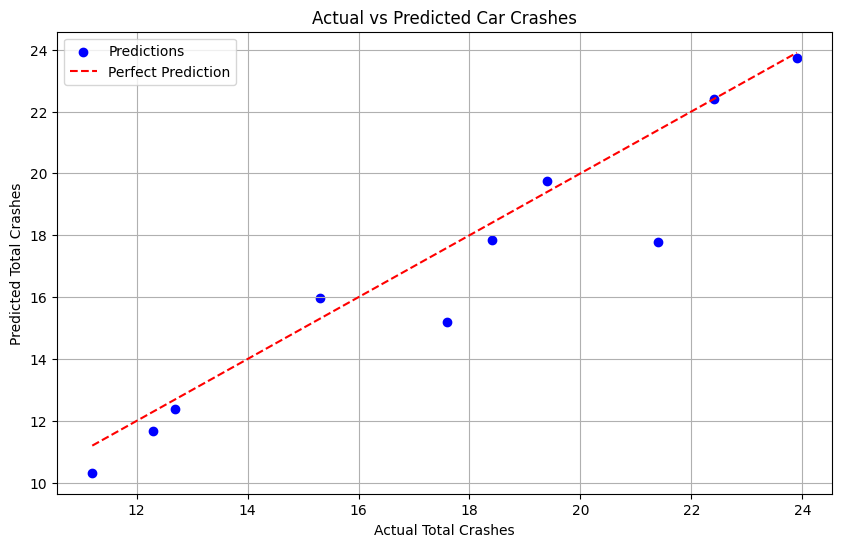

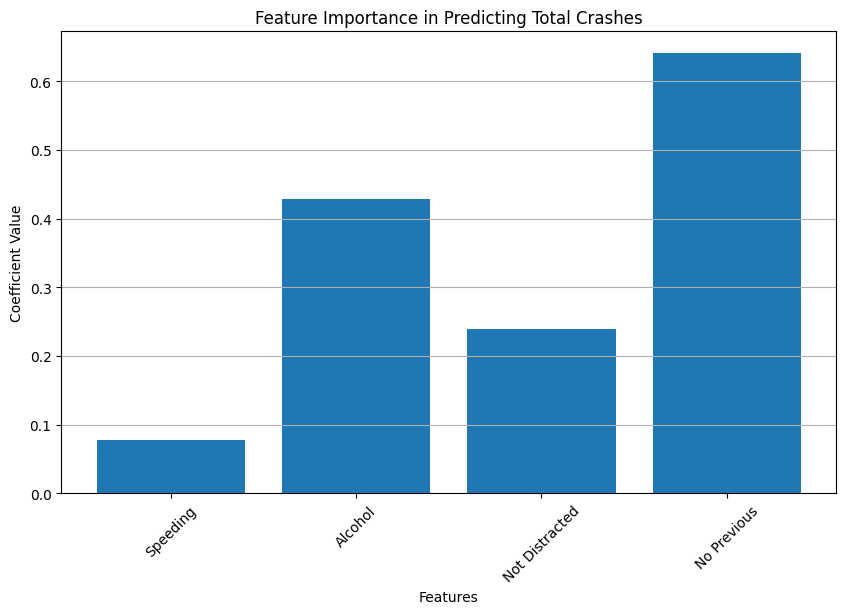

In [ ]:
class LinearRegression:
    def __init__(self):
        self.weights = None

    def fit(self, X, y):
        # Thêm cột bias
        X_bias = np.hstack([np.ones((X.shape[0], 1)), X])
        # Tính toán trọng số sử dụng phương trình chuẩn: w = (X^T X)^-1 X^T y
        self.weights = np.linalg.pinv(X_bias.T @ X_bias) @ X_bias.T @ y

    def predict(self, X):
        # Thêm cột bias
        X_bias = np.hstack([np.ones((X.shape[0], 1)), X])
        return X_bias @ self.weights

# Huấn luyện mô hình
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán
y_pred = model.predict(X_test)

# Tính toán R² và MSE
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# In kết quả
print('R² Score:', r2_score(y_test, y_pred))
print('Mean Squared Error:', mse(y_test, y_pred))
print('\nFeature coefficients:')
features = ['bias'] + ['speeding', 'alcohol', 'not_distracted', 'no_previous']
for feature, coef in zip(features, model.weights):
    print(f'{feature}: {coef:.4f}')

# Tạo biểu đồ scatter của giá trị thực tế và giá trị dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Total Crashes')
plt.ylabel('Predicted Total Crashes')
plt.title('Actual vs Predicted Car Crashes')
plt.legend()
plt.grid(True)
plt.show()

# Vẽ biểu đồ tầm quan trọng của các đặc trưng
plt.figure(figsize=(10, 6))
feature_importance = model.weights[1:]  # Loại bỏ bias term
plt.bar(['Speeding', 'Alcohol', 'Not Distracted', 'No Previous'], feature_importance)
plt.title('Feature Importance in Predicting Total Crashes')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()


## Multi input - Multi output regression

### Split data

In [ ]:
X = df[['speeding', 'alcohol', 'not_distracted', 'no_previous']].values
y = df[['total', 'ins_premium', 'ins_losses']].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y)

R² scores for each output:
Speeding: 1.0000
Alcohol: 1.0000
Not Distracted: 1.0000
No Previous: 1.0000


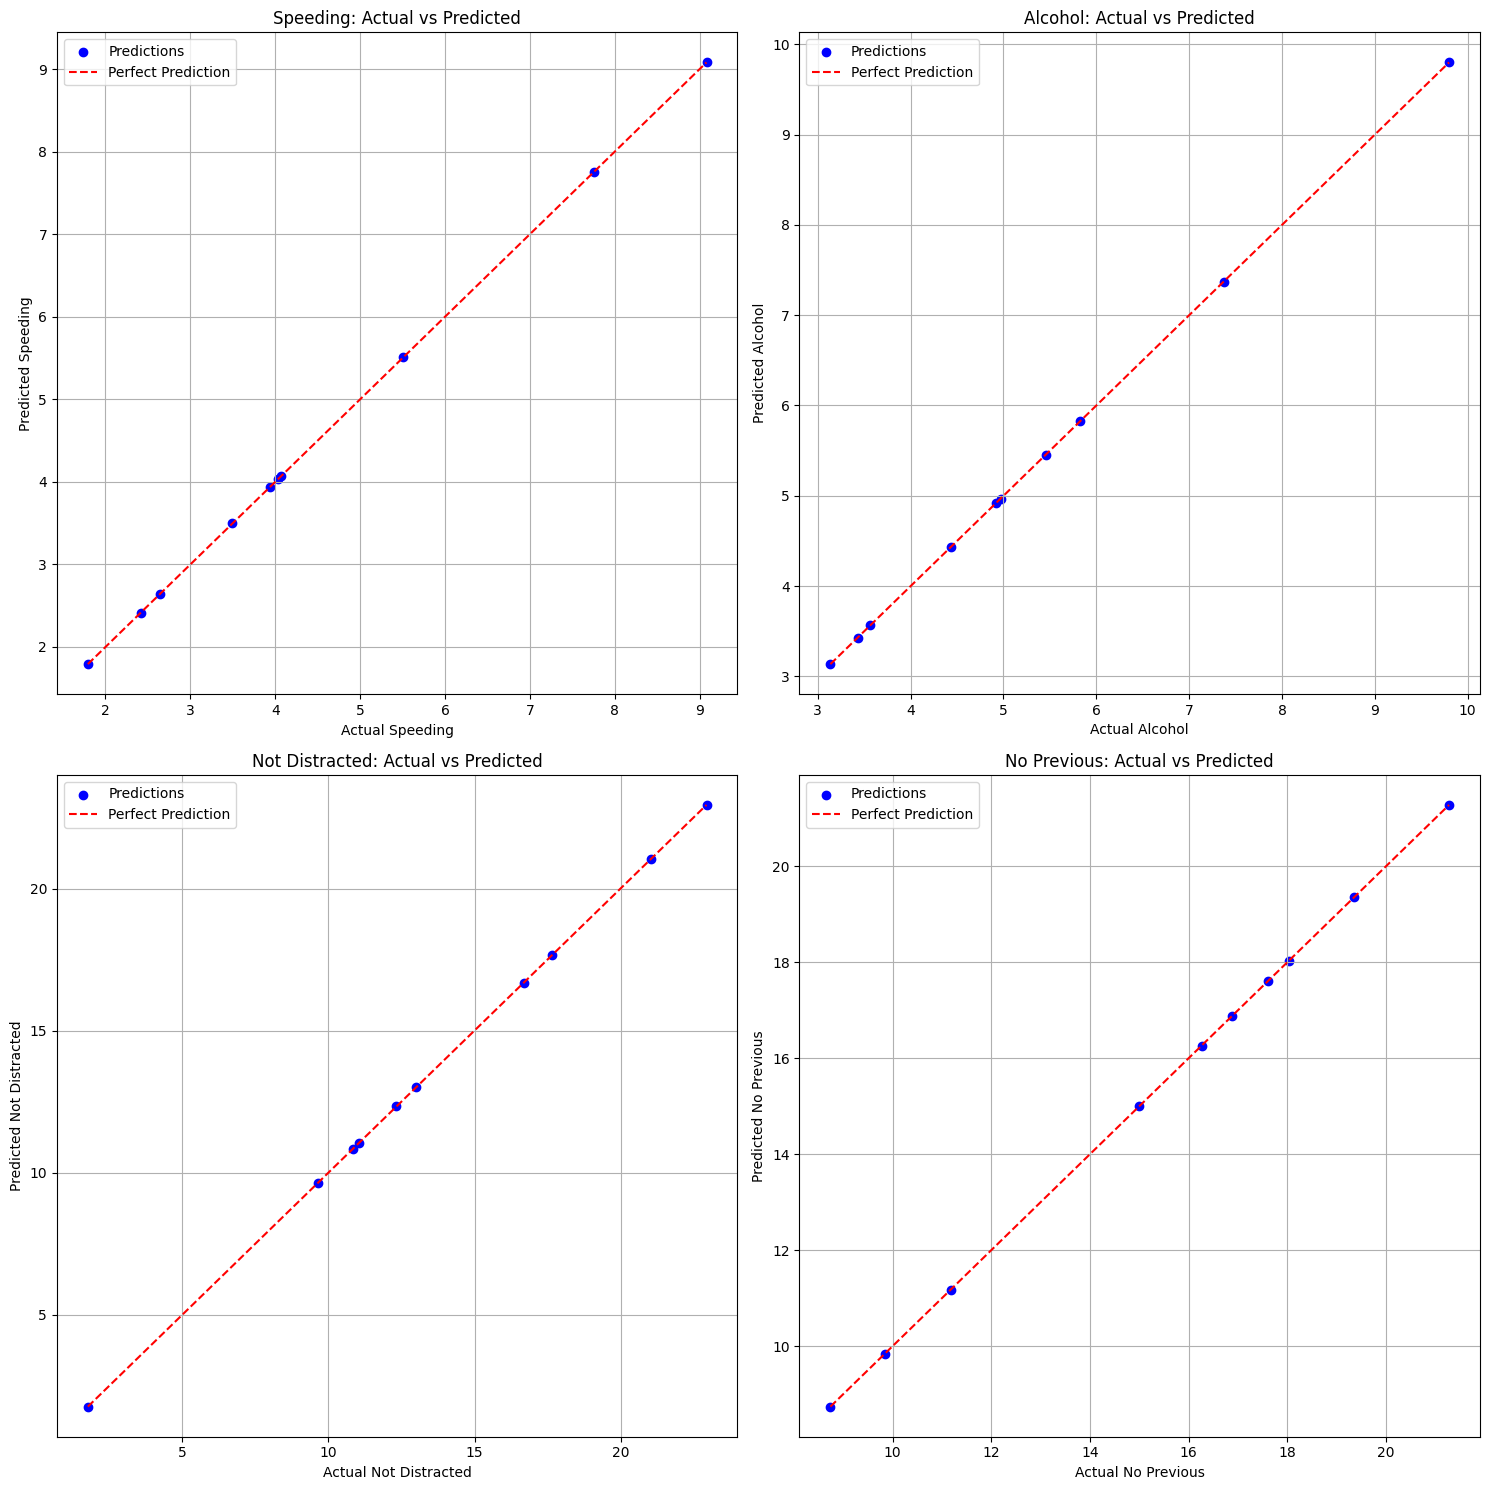

In [ ]:
# Prepare data for multi-output regression
# Inputs: speeding, alcohol, not_distracted, no_previous
# Outputs: speeding, alcohol, not_distracted, no_previous (predicting these values)

class MultiOutputRegression:
    def __init__(self):
        self.weights = None

    def fit(self, X, Y):
        # Add bias term
        X = np.c_[np.ones(X.shape[0]), X]
        # Calculate weights using normal equation for each output
        self.weights = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
        return self

    def predict(self, X):
        # Add bias term
        X = np.c_[np.ones(X.shape[0]), X]
        return X.dot(self.weights)

# Prepare data
# X: speeding, alcohol, not_distracted, no_previous
# Y: total, ins_premium, ins_losses


# Train model
model_multi = MultiOutputRegression()
model_multi.fit(X_train, X_train)  # Using same features as both input and output

# Make predictions
Y_pred = model_multi.predict(X_test)

# Calculate R² for each output
def r2_score_multi(y_true, y_pred):
    r2_scores = []
    for i in range(y_true.shape[1]):
        ss_res = np.sum((y_true[:, i] - y_pred[:, i]) ** 2)
        ss_tot = np.sum((y_true[:, i] - np.mean(y_true[:, i])) ** 2)
        r2_scores.append(1 - (ss_res / ss_tot))
    return r2_scores

# Calculate and print R² scores
r2_scores = r2_score_multi(X_test, Y_pred)
feature_names = ['Speeding', 'Alcohol', 'Not Distracted', 'No Previous']
print("R² scores for each output:")
for name, score in zip(feature_names, r2_scores):
    print(f"{name}: {score:.4f}")

# Visualize actual vs predicted values for each output
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.ravel()

for idx, (name, ax) in enumerate(zip(feature_names, axes)):
    ax.scatter(X_test[:, idx], Y_pred[:, idx], color='blue', label='Predictions')
    min_val = min(X_test[:, idx].min(), Y_pred[:, idx].min())
    max_val = max(X_test[:, idx].max(), Y_pred[:, idx].max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')
    ax.set_xlabel(f'Actual {name}')
    ax.set_ylabel(f'Predicted {name}')
    ax.set_title(f'{name}: Actual vs Predicted')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

## CNN - 3 layers

### Split data

In [ ]:
# Prepare data
X = df[['speeding', 'alcohol', 'not_distracted', 'no_previous']].values
y = df['total'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Normalize data

In [ ]:
def normalize_data(X):
    return (X - X.mean(axis=0)) / X.std(axis=0)

X_train_normalized = normalize_data(X_train)
X_test_normalized = normalize_data(X_test)

Epoch 0, Loss: 252.1383
Epoch 100, Loss: 3.7538
Epoch 200, Loss: 0.5243
Epoch 300, Loss: 0.4657
Epoch 400, Loss: 0.4480
Epoch 500, Loss: 0.4401
Epoch 600, Loss: 0.4355
Epoch 700, Loss: 0.4329
Epoch 800, Loss: 0.4308
Epoch 900, Loss: 0.4285

Training R² Score: 0.9724523292470144
Test R² Score: 0.6979990433432512


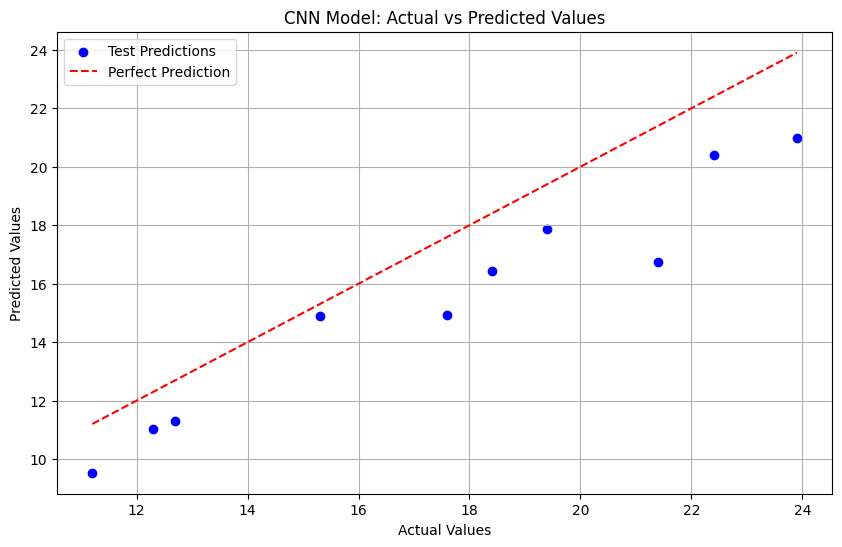

In [ ]:
class CNN:
    def __init__(self, input_shape):
        self.input_shape = input_shape

        # Initialize weights and biases for 3 layers
        np.random.seed(42)
        self.W1 = np.random.randn(4, 8) * 0.01
        self.b1 = np.zeros((1, 8))
        self.W2 = np.random.randn(8, 4) * 0.01
        self.b2 = np.zeros((1, 4))
        self.W3 = np.random.randn(4, 1) * 0.01
        self.b3 = np.zeros((1, 1))

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return np.where(x > 0, 1, 0)

    def forward(self, X):
        # Forward propagation through 3 layers
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.relu(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self.relu(self.Z2)
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        return self.Z3

    def backward(self, X, y, learning_rate=0.01):
        m = X.shape[0]

        # Backward propagation
        dZ3 = self.Z3 - y.reshape(-1, 1)
        dW3 = (1/m) * np.dot(self.A2.T, dZ3)
        db3 = (1/m) * np.sum(dZ3, axis=0, keepdims=True)

        dA2 = np.dot(dZ3, self.W3.T)
        dZ2 = dA2 * self.relu_derivative(self.Z2)
        dW2 = (1/m) * np.dot(self.A1.T, dZ2)
        db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)

        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.relu_derivative(self.Z1)
        dW1 = (1/m) * np.dot(X.T, dZ1)
        db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)

        # Update parameters
        self.W3 -= learning_rate * dW3
        self.b3 -= learning_rate * db3
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

    def train(self, X, y, epochs=1000, learning_rate=0.01):
        for epoch in range(epochs):
            # Forward propagation
            predictions = self.forward(X)

            # Backward propagation
            self.backward(X, y, learning_rate)

            if epoch % 100 == 0:
                loss = np.mean((predictions - y.reshape(-1, 1)) ** 2)
                print(f'Epoch {epoch}, Loss: {loss:.4f}')

# Train the model
model = CNN(input_shape=4)
model.train(X_train_normalized, y_train, epochs=1000, learning_rate=0.01)

# Make predictions
train_predictions = model.forward(X_train_normalized)
test_predictions = model.forward(X_test_normalized)

# Calculate R² score for training and test sets
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred.flatten()) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

print("\nTraining R² Score:", r2_score(y_train, train_predictions))
print("Test R² Score:", r2_score(y_test, test_predictions))

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predictions, color='blue', label='Test Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('CNN Model: Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()